#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [4]:
conda install sympy

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/cpizina/miniconda3

  added / updated specs:
    - sympy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gmpy2-2.2.2                |  py313ha78e65c_0         265 KB
    mpmath-1.3.0               |  py313h06a4308_0        1000 KB
    sympy-1.14.0               |  py313h06a4308_1        14.3 MB
    ------------------------------------------------------------
                                           Total:        15.5 MB

The following NEW packages will be INSTALLED:

  gmpy2              pkgs/main/linux-64::gmpy2-2.2.2-py313ha78e65c_0 
  mpc                pkgs/main/linux-64::mpc-1.3.1-h5eee18b_0 
  mpfr               pkgs/main/linux-64::mpfr-4.2.1-h5eee18b_0 
  mpmath             pkgs/main/linux-64::mpmath-1.3.0

In [40]:
import sympy as sp
import numpy as np
import math

In [58]:
def taylor_series(n, f, x0):
    f0 = f.subs(x, x0)
    taylor_exp = f0
    for i in range(1, n):
        f_ith = sp.diff(f, x, i)
        fi_x0 = f_ith.subs(x, x0)
        taylor_exp = taylor_exp + (x - x0)**i * fi_x0 / math.factorial(i)
    return taylor_exp

In [64]:
x = sp.symbols('x')
f = x**2 + sp.sin(x)
x0 = 1
taylor_series(4, f, x0)

-(x - 1)**3*cos(1)/6 + (2 - sin(1))*(x - 1)**2/2 + (x - 1)*(cos(1) + 2) + sin(1) + 1

In [63]:
f = x**2 + sp.sin(x)
f.series(x, x0=1, n=4)

1 + sin(1) + (x - 1)*(cos(1) + 2) + (1 - sin(1)/2)*(x - 1)**2 - (x - 1)**3*cos(1)/6 + O((x - 1)**4, (x, 1))

#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [84]:
a =[ [1, 2 , 3], [3,4, 3] ]
b = [ [1, 2 , 3], [3,4, 3], [1, 1, 1] ]
len(a[0])

3

In [82]:
def mat_multiply(A, B):
    # Grab inputs dimension
    m = len(A)
    n = len(B[0])
    p = len(A[0])

    # Initialize output matrix
    C = [[0 for i in range (n)] for i in range (m)] # matrix size is m x n

    # Iterate over each entry
    for i in range(m):
        for j in range(n):
            for k in range(p):
                C[i][j] += A[i][k] * B[k][j]  
    return C

In [88]:
%%timeit 
mat_multiply(a, b)

2.93 μs ± 29.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [83]:
def mat_mul_nump(A, B):
    return np.matmul(A, B)

In [89]:
%%timeit
mat_mul_nump(a, b)

4.46 μs ± 74.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

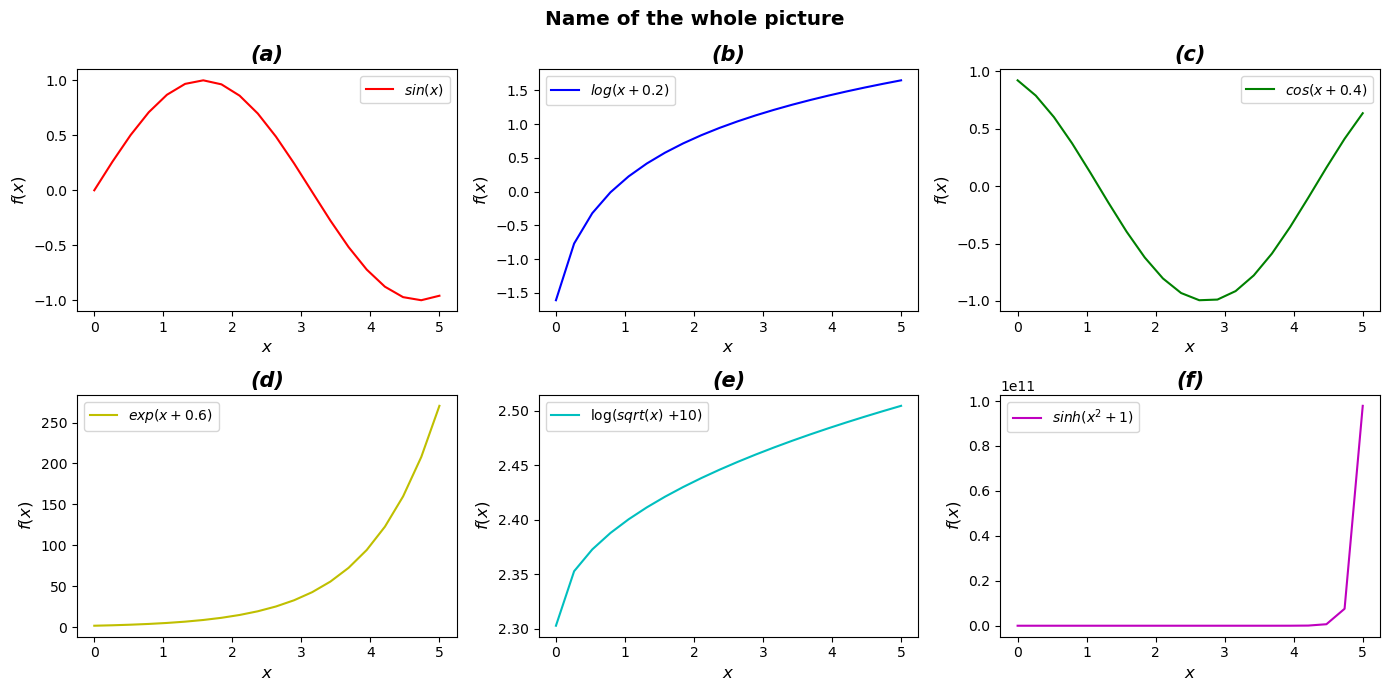

In [118]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.log(x + 0.2)
y3 = np.cos(x + 0.4)
y4 = np.exp(x + 0.6)
y5 = np.log(np.sqrt(x) + 10)
y6 = np.sinh(x**2 + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Name of the whole picture',fontweight='bold', fontsize='x-large')
plt.subplots_adjust(hspace=0.3, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('(a)',fontsize = '15',fontstyle='italic',fontweight='bold')
plt.ylabel('$f(x)$',fontsize = '12',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$',fontsize = '12',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r', label = '$sin(x)$')
plt.legend()

plt.subplot(232)
plt.plot(x,y2,color='b', label = '$log(x+0.2)$')
plt.title('(b)',fontsize = '15',fontstyle='italic',fontweight='bold')
plt.ylabel('$f(x)$',fontsize = '12',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$',fontsize = '12',fontstyle='normal',fontweight = 'medium')
plt.legend()

plt.subplot(233)
plt.plot(x,y3,color='g', label = '$cos(x + 0.4)$')
plt.title('(c)',fontsize = '15',fontstyle='italic',fontweight='bold')
plt.ylabel('$f(x)$',fontsize = '12',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$',fontsize = '12',fontstyle='normal',fontweight = 'medium')
plt.legend()

plt.subplot(234)
plt.plot(x,y4,color='y', label = '$exp(x+0.6)$')
plt.title('(d)',fontsize = '15',fontstyle='italic',fontweight='bold')
plt.ylabel('$f(x)$',fontsize = '12',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$',fontsize = '12',fontstyle='normal',fontweight = 'medium')
plt.legend()

plt.subplot(235)
plt.plot(x,y5,color='c', label = 'log($sqrt(x)$ +10)')
plt.title('(e)',fontsize = '15',fontstyle='italic',fontweight='bold')
plt.ylabel('$f(x)$',fontsize = '12',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$',fontsize = '12',fontstyle='normal',fontweight = 'medium')
plt.legend()

plt.subplot(236)
plt.plot(x,y6,color='m', label = '$sinh(x^2 + 1)$')
plt.title('(f)',fontsize = '15',fontstyle='italic',fontweight='bold')
plt.ylabel('$f(x)$',fontsize = '12',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$',fontsize = '12',fontstyle='normal',fontweight = 'medium')
plt.legend()

# removed extra white space
plt.tight_layout()
plt.savefig('output.png')
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

In [125]:
def recaman_sequence(n):
    seq = []
    seq.append(0)
    
    for i in range(1, n):
        a = seq[i-1] - i
        b = seq[i-1] + i
        
        if a > 0:
            if not a in seq:
                seq.append(a)
            else:
                 seq.append(b)
                
        else:
            seq.append(b)
            
    return seq

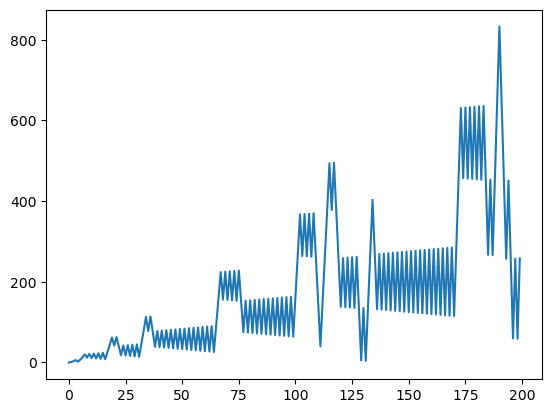

In [159]:
seq = recaman_sequence(200)
plt.plot(seq)

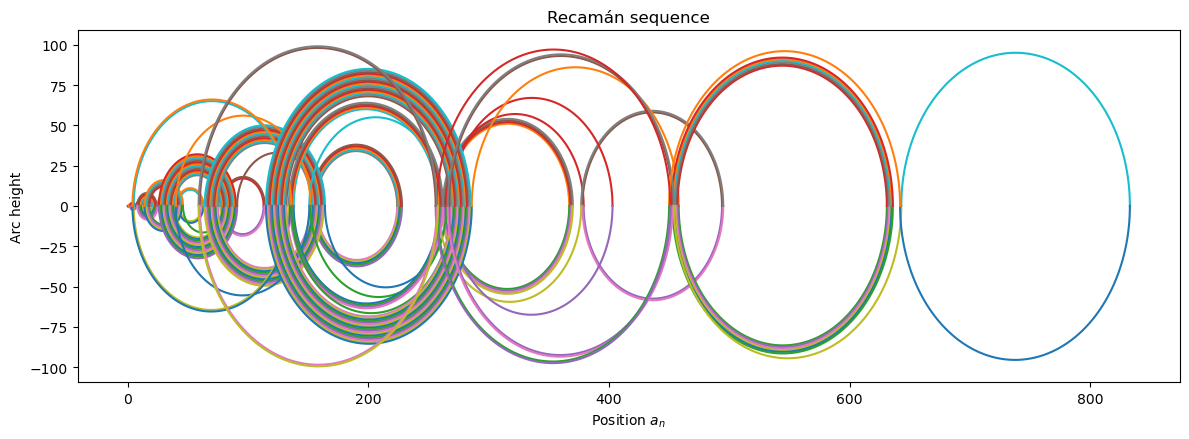

In [168]:
fig, ax = plt.subplots(figsize=(12, 4.5))
x = []
y = []
for i in range(1, len(seq)):
    x1, x2 = seq[i-1], seq[i]
    center = (x1 + x2) / 2
    radius = abs(x1 - x2) / 2
    
    if i %2 == 0:
        theta = np.linspace(0, np.pi, 100)
    else:
        theta = np.linspace(np.pi, 2*np.pi, 100)
    
    x_arc = center + radius * np.cos(theta)
    y_arc = radius * np.sin(theta)
    ax.plot(x_arc, y_arc)
    
ax.set_title('Recamán sequence')

ax.set_xlabel('Position $a_n$')
ax.set_ylabel('Arc height')
plt.tight_layout();


#### **Exercise 5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

In [173]:
def circle(x, r):
    return np.sqrt(r**2 - x**2)

/tmp/ipykernel_153016/1047803798.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - x**2)


(np.float64(-1.1),
 np.float64(1.1),
 np.float64(-0.049999974949918626),
 np.float64(1.0499994739482912))

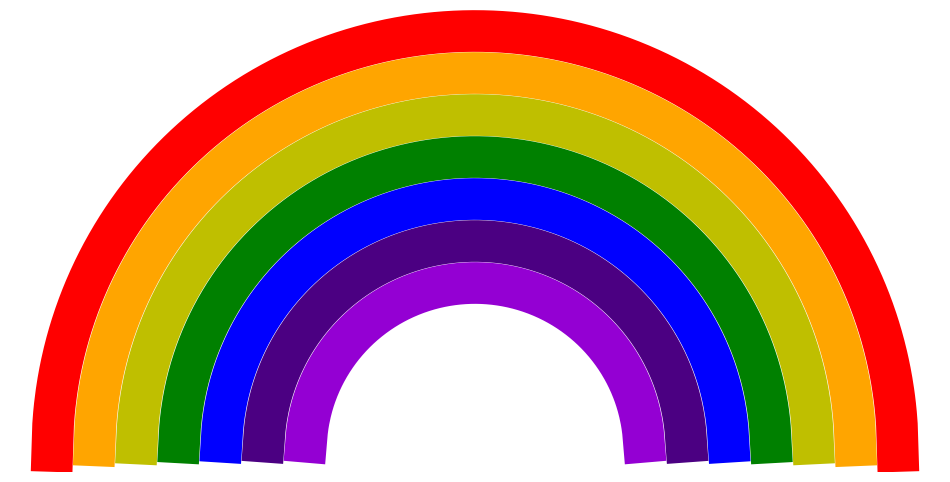

In [217]:
x = np.linspace(-1,1,1000)
y1 = circle(x, 1)
y2 = circle(x, 0.9)
y3 = circle(x, 0.8)
y4 = circle(x, 0.7)
y5 = circle(x, 0.6)
y6 = circle(x, 0.5)
y7 = circle(x, 0.4)

plt.figure(figsize=(12, 6))
plt.plot(x, y1, linewidth = '30', color ='r')
plt.plot(x, y2, linewidth = '30', color ='orange' )
plt.plot(x, y3, linewidth = '30', color ='y')
plt.plot(x, y4, linewidth = '30', color ='g')
plt.plot(x, y5, linewidth = '30', color ='b')
plt.plot(x, y6, linewidth = '30', color ='indigo')
plt.plot(x, y7, linewidth = '30', color ='darkviolet')
plt.axis(False)

#### **Exercise 6:**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

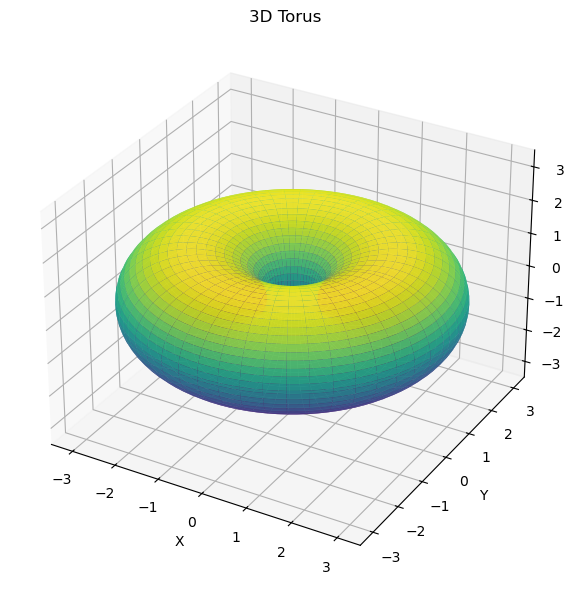

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

R = 2.0 
r = 1.5  

# Parametric angles
u = np.linspace(0, 2*np.pi, 100) 
v = np.linspace(0, 2*np.pi, 100)  
U, V = np.meshgrid(u, v)
# 3D torus parametric equations

X = (R + r * np.cos(V)) * np.cos(U)
Y = (R + r * np.cos(V)) * np.sin(U)
Z = r*np.sin(V)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, linewidth=0, antialiased=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Torus')

ax.set_xlim(-r-R,r+R) 
ax.set_ylim(-r-R,r+R)
ax.set_zlim(-r-R,r+R) 

plt.tight_layout()
plt.show()

#### **Exercise 7:**

Repeat the curve fitting example (from SciPy lecture) with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend


In [311]:
#Clausius clapeyron
def f(x, a, b):
    return a*np.exp(-b/x)
# creating the file
x = np.linspace(250, 300, 100)
y = f(x, 2e8 , 5e3) +  np.random.normal(size=100)

np.savetxt('xy_data.txt', np.column_stack([x, y]), 
           fmt='%.6f %.6f', 
           delimiter=' ')

[9.49383675e+08 5.45046482e+03]


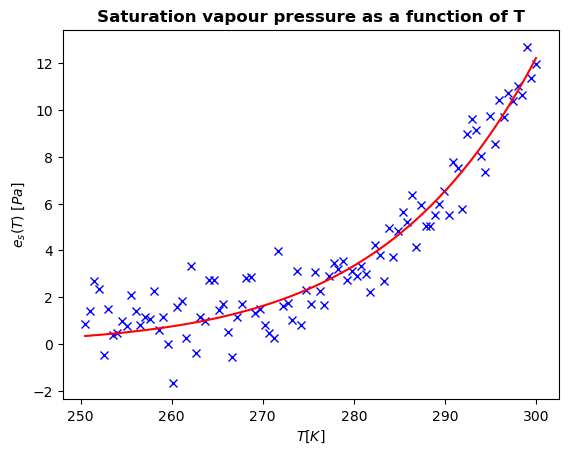

In [340]:
from scipy import optimize
np.random.seed(0)

data = np.loadtxt('xy_data.txt', skiprows=1)
x, y = data[:,0], data[:,1]

params, params_cov = optimize.curve_fit(f, x, y)
print(params)

# plot the data and the fitted curve
plt.title('Saturation vapour pressure as a function of T', fontweight='bold')
plt.plot(x, y, 'bx')
# plt.plot(x,f(x,1.3,0.9),'g-')
plt.plot(x, f(x, *params), color='r')
plt.ylabel('$e_s(T)$ $[Pa]$')
plt.xlabel('$T[K]$');

#### **Exercise 8:**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

In [347]:
from scipy.integrate import quad

def func(x):
    return x**2 + 10*np.sin(x)

result, error = quad(func, -10, 10)
print("Result:", result)
print("Error:", error)
#help(quad)

Result: 666.6666666666667
Error: 7.655722985888797e-12


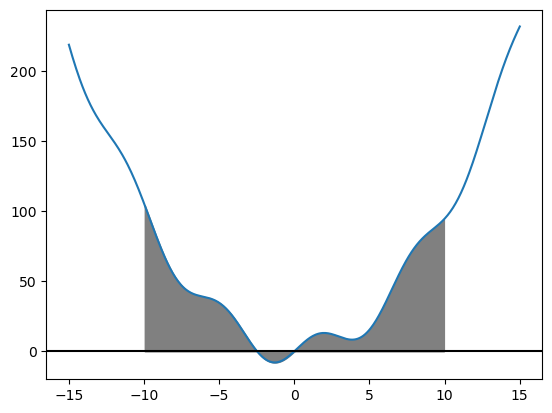

In [363]:
x = np.linspace(-15, 15, 500)
y = func(x)
yy = 0
plt.plot(x,y)
plt.axhline(y=0, color='black')
r = (x>-10) & (x<10)
plt.fill_between(x[r], yy, y[r], color='grey');

In [369]:
x = sp.symbols('x')
I = sp.integrate(x**2 + 10*sp.sin(x), (x, -10, 10)) 
print(float(I))

666.6666666666666
